<a href="https://colab.research.google.com/github/duyguakar/CS210_TermProject_AnalyzingMyGirlsGroupChat/blob/main/Data_Analysis_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis and Visualizations**

In [ ]:
import pandas as pd
import altair as alt
file_path = 'final_chat_data.csv'
df = pd.read_csv(file_path)


### **Some Cleaning In The House**

We now imported the data into pandas frame, the next step is to ensure the data is clean and ready for analysis.This involves checking for missing or incorrect values and transforming columns to the appropriate format.

We will now handle the missing values. They may occur in columns:
    Sender: If missing, replace with 'Unknown'.
    Type: Ensure it has valid entries (Text, Media, or system). If missing, replace with 'Unknown'.

We will also parse timestamps and make sure we get a datetime object. So that we can perform time-based analysis. We use the pd.to_datetime() function to perform this conversion.

In [ ]:
# Step 1: Inspect the data
print(df.head())

# Step 2: Handle missing values
df['Sender'] = df['Sender'].fillna('Unknown')
df['Type'] = df['Type'].fillna('Unknown')

# Step 3: Parse the Timestamp column
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


print(df.info())


#**Time To Visualize**

###**Contribution Wrapped**



To analyze sender activity, we want to count the number of messages sent by each sender. This will show who contributed the most messages to the group.

We can use the groupby() function in pandas to group the data by the Sender column and then count the number of rows (messages) for each sender

In [ ]:
activity_counts = df[df['Type'] == 'Text'].groupby('Sender').size().reset_index(name='Message Count')


Then, we visualize with this code frame

In [ ]:
activity_chart = alt.Chart(activity_counts).mark_bar().encode(
    x=alt.X('Sender:N', sort='-y', title='Sender'),
    y=alt.Y('Message Count:Q', title='Number of Messages'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Sender Activity: Number of Messages Sent',
    width=600,
    height=400
)


In [ ]:
import pandas as pd
import altair as alt

# Step 1: Load the preprocessed chat data
file_path = 'final_chat_data.csv'  # Replace with your file path if running locally
df = pd.read_csv(file_path)

# Step 2: Data cleaning and preparation
df['Sender'] = df['Sender'].fillna('Unknown')  # Replace missing Sender with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')  # Replace missing Type with 'Unknown'
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert Timestamp to datetime format

# Step 3: Analyze sender activity (who was more active)
# Group and count messages by sender
activity_counts = df[df['Type'] == 'Text'].groupby('Sender').size().reset_index(name='Message Count')

# Sort the results by message count
activity_counts = activity_counts.sort_values(by='Message Count', ascending=False)

# Step 4: Visualize the sender activity (bar chart)
activity_chart = alt.Chart(activity_counts).mark_bar().encode(
    x=alt.X('Sender:N', sort='-y', title='Sender'),
    y=alt.Y('Message Count:Q', title='Number of Messages'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Sender Activity: Number of Messages Sent',
    width=600,
    height=400
)


activity_chart.display()



alt.Chart(...)

###**It's Like Your Spotify Wrapped-Message for Each Month**

In [ ]:

df['Month'] = df['Timestamp'].dt.to_period('M')  # Use 'M' to extract Year-Month period


monthly_activity = df.groupby('Month').size().reset_index(name='Message Count')


monthly_activity['Month'] = monthly_activity['Month'].dt.to_timestamp()

# Create the line chart for monthly activity
monthly_activity_chart = alt.Chart(monthly_activity).mark_line(point=True).encode(
    x=alt.X('Month:T', title='Month'),
    y=alt.Y('Message Count:Q', title='Number of Messages'),
    tooltip=['Month:T', 'Message Count:Q']
).properties(
    title='Monthly Message Activity',
    width=600,
    height=400
)


monthly_activity_chart.display()


alt.Chart(...)

###**Wake Up You Have A Message!-Time Based Analysis**

To analyze activity by the hour of the day, we extract the hour from the Timestamp column and count the messages for each hour. Here's the code to generate the chart.

In [ ]:

df['Hour'] = df['Timestamp'].dt.hour  # Extract hour (0 to 23)

# Group by Hour and count messages
hourly_activity = df.groupby('Hour').size().reset_index(name='Message Count')


hourly_activity_chart = alt.Chart(hourly_activity).mark_bar().encode(
    x=alt.X('Hour:O', title='Hour of the Day (24-hour format)'),
    y=alt.Y('Message Count:Q', title='Number of Messages'),
    tooltip=['Hour:O', 'Message Count:Q']
).properties(
    title='Activity by Hour of the Day',
    width=600,
    height=400
)


hourly_activity_chart.display()


alt.Chart(...)

Seems like the groupchat is active all day!

##**Ne Çektin Be!-- Who Used The Word OF the Most**

Regex Pattern:

r'\b[oO][fF]+\b' was used.

[oO]: Matches lowercase or uppercase "o".
[fF]+: Matches one or more lowercase or uppercase "f"s.
Matches variations like "of", "OFF", "offf", "OFFFF", etc.
Counting Matches:

re.findall(pattern, str(message)): Finds all matches in the message text.
The len() function counts the matches.

In [ ]:
import re

# Define a regex pattern to match "of", "off", "offf", "OFFFF", etc., case insensitive
pattern = r'\b[oO][fF]+\b'


def count_occurrences(message):
    return len(re.findall(pattern, str(message)))

df['Word Count'] = df['Message'].apply(count_occurrences)

# Group by Sender and sum the word counts
word_usage = df.groupby('Sender')['Word Count'].sum().reset_index(name='Usage Count')

# Sort by usage count for better visualization
word_usage = word_usage.sort_values(by='Usage Count', ascending=False)


word_usage_chart = alt.Chart(word_usage).mark_bar().encode(
    x=alt.X('Sender:N', sort='-y', title='Sender'),
    y=alt.Y('Usage Count:Q', title='Word Usage Count'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Usage of "of", "off", or "OFFFF" by Sender',
    width=600,
    height=400
)

word_usage_chart.display()


alt.Chart(...)

##**You Talk Too Much!-Who Sent The Most Messages**

To analyze who sends the highest average number of words we follows these steps.

1) Calculate Word Counts:

len(str(x).split()): Splits each message into words and counts them.
Applies this function to the Message column for all rows.
2) Group and Aggregate:

groupby('Sender'): Groups the data by Sender.
agg(['sum', 'mean']): Calculates both the total (sum) and average (mean) word counts for each sender.

3)Sort Results:
Sort by Total Words in descending order.

In [ ]:
# Step 1: Calculate the number of words in each message
df['Word Count'] = df['Message'].apply(lambda x: len(str(x).split()))

# Step 2: Group by sender and calculate total and average word counts
word_stats = df.groupby('Sender')['Word Count'].agg(['sum', 'mean']).reset_index()
word_stats.rename(columns={'sum': 'Total Words', 'mean': 'Average Words'}, inplace=True)

# Step 3: Sort by total words for better visualization
word_stats = word_stats.sort_values(by='Total Words', ascending=False)

total_words_chart = alt.Chart(word_stats).mark_bar().encode(
    x=alt.X('Sender:N', sort='-y', title='Sender'),
    y=alt.Y('Total Words:Q', title='Total Number of Words'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Total Words Sent by Each Sender',
    width=600,
    height=400
)


total_words_chart.display()


alt.Chart(...)

##**Best Of-Top Words Used**

To analyze the top words used, we’ll extract all words from the Message column, clean the text (removing common stop words and non-alphanumeric characters), and count the frequency of each word. Here’s how to do it:

To analyze the word count we first:
Exclude Stop Words:

A predefined set of common words (like "the", "and", "is") that don’t add much meaning and are excluded.Also turkish vrsions are incldued.


Tokenize:

The re.findall(r'\b\w+\b', ...) regex extracts only words (letters and numbers) from messages, ignoring punctuation.

Word Frequency Count:

Combines all words into a single list (all_words) and uses Counter to count the frequency of each word.

In [ ]:
from collections import Counter
import re

# Step 1: Define stop words (including Turkish stop words)
stop_words = set([
    "the", "and", "is", "in", "to", "of", "a", "on", "for", "with", "at", "it", "as", "an", "by", "this",
    "that", "are", "was", "be", "or", "we", "you", "i", "not", "but", "from", "our", "they", "their", "my",
    "de", "mi", "ve", "da", "ama", "o", "ne", "ben", "sen","çok", "cok", "benim", "daha","en", "ki" # Turkish stop words
])

# Step 2: Function to clean and tokenize messages
def tokenize_message(message):
    words = re.findall(r'\b\w+\b', str(message).lower())  # Extract words and convert to lowercase
    return [word for word in words if word not in stop_words]

# Step 3: Apply the function to all messages and count word frequencies
all_words = []
df['Message'].dropna().apply(lambda x: all_words.extend(tokenize_message(x)))
word_counts = Counter(all_words)

# Step 4: Create a DataFrame for the top words
top_words = pd.DataFrame(word_counts.most_common(20), columns=['Word', 'Count'])

# Step 5: Create a bar chart to visualize the top words
top_words_chart = alt.Chart(top_words).mark_bar().encode(
    x=alt.X('Count:Q', title='Frequency'),
    y=alt.Y('Word:N', sort='-x', title='Word'),
    color=alt.Color('Word:N', legend=None)
).properties(
    title='Top 20 Words Used (Excluding Stop Words)',
    width=600,
    height=400
)

# Render the chart
top_words_chart.display()



alt.Chart(...)

##**It's Getting Hot In Here! Heatmap of Daily Activity**

In [ ]:
#  Extract hour and weekday from the timestamp
df['Hour'] = df['Timestamp'].dt.hour  # Extract hour (0 to 23)
df['Weekday'] = df['Timestamp'].dt.day_name()  # Extract day of the week (e.g., Monday, Tuesday)


heatmap_data = df.groupby(['Weekday', 'Hour']).size().reset_index(name='Message Count')


weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data['Weekday'] = pd.Categorical(heatmap_data['Weekday'], categories=weekday_order, ordered=True)


heatmap_chart = alt.Chart(heatmap_data).mark_rect().encode(
    x=alt.X('Hour:O', title='Hour of the Day (24-hour format)'),
    y=alt.Y('Weekday:N', title='Day of the Week', sort=weekday_order),
    color=alt.Color('Message Count:Q', scale=alt.Scale(scheme='viridis'), title='Messages'),
    tooltip=['Weekday:N', 'Hour:O', 'Message Count:Q']
).properties(
    title='Message Activity Heatmap by Hour and Day',
    width=600,
    height=400
)


heatmap_chart.display()


alt.Chart(...)

The interpretation of the heatmap signifies:

1) Busy Days:

The brightest colors (highest activity) indicate the days with the most messages.
For example, Friday and Sunday show significant activity in some hours, meaning these days are the most active in the group.

2) Peak Hours:

The hours with the brightest cells indicate when most messages were sent.
For example:
Early mornings (e.g., 4–6 AM) and mid-day (e.g., 10–12 PM) on Sunday appear to have high activity.
Late-night hours on Friday (e.g., 2–4 AM) also show noticeable spikes.

##**Write me Back Now!-A visualization On Görüldü**

To analyze response times, we’ll calculate the time difference between a message and the one it replies to (if reply information is available in the data). This will help us understand how quickly users respond to each other.

**Calculate Response Times**

1)The .diff() method calculates the time difference between consecutive messages.
.dt.total_seconds() converts the time difference to seconds.

2)Drop NaN Values:

The first message has no previous message, so its response time is NaN and is dropped.
3)Filter Outliers:

Exclude response times greater than 1 day (86,400 seconds) to focus on meaningful replies.
Box Plot:

**x-axis:** Sender names.
**y-axis:** Response times in seconds.
**Boxes:** Show the interquartile range (IQR) of response times.
**Points:** Highlight unusually long response times (outliers)

In [ ]:
import pandas as pd
import numpy as np
import altair as alt


file_path = 'final_chat_data.csv'
df = pd.read_csv(file_path)

# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Exclude system messages
df = df[df['Type'] != 'System']

# Step 1: Sort data by Timestamp to maintain chronological order
df = df.sort_values(by='Timestamp')

# Step 2: Calculate response times (time difference between consecutive messages)
df['Response Time (Seconds)'] = df['Timestamp'].diff().dt.total_seconds()

# Step 3: Assign response times to senders (skip the first message which has NaN for response time)
response_time_df = df[['Sender', 'Response Time (Seconds)']].dropna()

# Step 4: Filter out extremely long response times
response_time_df = response_time_df[response_time_df['Response Time (Seconds)'] <= 86400]  # 1 day = 86400 seconds

# Step 5: Exclude the 'System' sender from the data
response_time_df = response_time_df[response_time_df['Sender'] != 'System']

# Step 6: Create a box plot for response times by sender (excluding system)
response_time_boxplot_no_system = alt.Chart(response_time_df).mark_boxplot().encode(
    x=alt.X('Sender:N', title='Sender'),
    y=alt.Y('Response Time (Seconds):Q', title='Response Time (Seconds)'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Response Time Distribution by Sender (Excluding System)',
    width=600,
    height=400
)


response_time_boxplot_no_system.display()


alt.Chart(...)

**1. Fastest Responders**
Users with the shortest median response times (indicated by the position of the box center along the y-axis) are generally the most active and responsive participants.
For example:
If a sender like "Azra" or "Ben" has consistently low response times, they are likely the fastest at replying to messages.

**2. Inconsistent Responders**
Users with a wide interquartile range (IQR) (indicated by the height of the box) show variability in response times.
Narrow boxes: Indicate consistent response times, such as regular engagement.
Wide boxes: Suggest users sometimes respond quickly but also take much longer at other times.

**3. Outliers**
Points outside the whiskers represent extremely long response times (e.g., delayed replies).
Frequent outliers may indicate irregular participation.
If "Defne" or "Duru" has many points above the whiskers, they might sometimes delay their responses for hours or even days.

##**Your Spotlight-Sender Specific Analysis**

To conduct a sender-specific analysis, we will calculate the median response time, IQR (Interquartile Range), and analyze outliers for each sender. This allows us to focus on users with the shortest or longest response times and understand their participation patterns.



In [ ]:

sender_stats = response_time_df.groupby('Sender')['Response Time (Seconds)'].describe(percentiles=[0.25, 0.5, 0.75]).reset_index()

# Rename columns for clarity
sender_stats.rename(columns={
    '50%': 'Median Response Time (Seconds)',
    '25%': 'Q1 (25th Percentile)',
    '75%': 'Q3 (75th Percentile)',
    'min': 'Min Response Time (Seconds)',
    'max': 'Max Response Time (Seconds)'
}, inplace=True)

# Step 1: Identify senders with the shortest and longest median response times
shortest_responders = sender_stats.nsmallest(3, 'Median Response Time (Seconds)')
longest_responders = sender_stats.nlargest(3, 'Median Response Time (Seconds)')

# Step 2: Print insights for shortest and longest responders
print("Senders with Shortest Median Response Times:")
print(shortest_responders)

print("\nSenders with Longest Median Response Times:")
print(longest_responders)

# Step 3: Visualize response time distribution for selected senders
selected_senders = shortest_responders['Sender'].tolist() + longest_responders['Sender'].tolist()
selected_data = response_time_df[response_time_df['Sender'].isin(selected_senders)]

# Create a box plot for selected senders
selected_boxplot = alt.Chart(selected_data).mark_boxplot().encode(
    x=alt.X('Sender:N', title='Sender'),
    y=alt.Y('Response Time (Seconds):Q', title='Response Time (Seconds)'),
    color=alt.Color('Sender:N', legend=None)
).properties(
    title='Response Time Distribution for Selected Senders',
    width=600,
    height=400
)


selected_boxplot.display()


Senders with Shortest Median Response Times:
   Sender    count        mean          std  Min Response Time (Seconds)  \
0    Azra   6086.0  239.659547  2003.187472                          0.0   
2   Defne  13060.0  234.005207  1797.811183                          0.0   
6  Zeynep   2518.0   94.212470   957.614070                          0.0   

   Q1 (25th Percentile)  Median Response Time (Seconds)  Q3 (75th Percentile)  \
0                   2.0                             3.0                   9.0   
2                   2.0                             4.0                  12.0   
6                   2.0                             4.0                   9.0   

   Max Response Time (Seconds)  
0                      78032.0  
2                      69004.0  
6                      30927.0  

Senders with Longest Median Response Times:
   Sender   count        mean          std  Min Response Time (Seconds)  \
4   Eslem   266.0  877.372180  3083.898531                          0.0  

alt.Chart(...)

**Calculate Descriptive Statistics:**

Use describe() to compute:
Median (50%): Represents the central tendency of response times.
Q1 (25% percentile) and Q3 (75% percentile): Help identify variability and IQR.
Min and Max values: Indicate extremes in response times.
Identify Fastest and Slowest Responders:

Use nsmallest() and nlargest() to identify senders with the shortest and longest median response times.

**According to the analyzed data the most active users wre Defne and Azra with the following statistics:**

Azra:

Median Response Time: 3 seconds (very fast).
IQR: [2 seconds (Q1) to 9 seconds (Q3)], indicating consistent and quick responses.
Message Count: 6086 (high activity level).
Max Response Time: 78,032 seconds (outlier).

Defne:

Median Response Time: 4 seconds (fast).
IQR: [2 seconds to 12 seconds], indicating slightly more variability than Azra.
Message Count: 13,060 (highest among all, very active participant).
Max Response Time: 69,004 seconds (outlier).

On the other hand, senders with the highset repsonse times were as follows

Eslem:

Median Response Time: 12 seconds (longest median response time).
IQR: [4 seconds (Q1) to 202.25 seconds (Q3)], indicating significant variability.
Message Count: 266 (very low participation).
Max Response Time: 32,240 seconds.

Duru:

Median Response Time: 8 seconds (moderately slow).
IQR: [3 seconds to 21 seconds], showing moderate consistency.
Message Count: 6749 (moderate activity).
Max Response Time: 81,510 seconds (highest outlier).


**Most Active Responders**

Azra, Defne, and Zeynep are the most active and consistent responders, with very short median response times and relatively narrow IQRs.

Defne stands out as the most engaged overall, with the highest message count (13,060) and fast response times.

**Least Active Responders**

Eslem has the lowest activity level with only 266 messages and the longest median response time (12 seconds). The wide IQR suggests inconsistent participation.

##**User To user Interaction**


To analyze user-to-user interaction in a WhatsApp group chat, we can leverage mentions (e.g., @username) or reply markers in the data. This allows us to build a network graph that visualizes interactions between members.

**Extract Mentions or Reply References:**

Parse messages to identify mentions (e.g., @username) or reply markers if the data contains reply metadata.
Build Interaction Data:

Create pairs of Sender (who wrote the message) and Mentioned/Reply Target (who is being referenced).
Count the frequency of interactions between users.

**Visualize as a Network Graph**

Nodes represent users.
Edges (lines between nodes) represent the frequency of interactions.

In [ ]:
import pandas as pd
import networkx as nx
import altair as alt


file_path = 'final_chat_data.csv'
df = pd.read_csv(file_path)

# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Mapping dictionary for numbers to usernames
number_to_username = {
    "905327801570": "Gülbin",
    "32470118635": "Defne",
    "905058121965": "Ben",
    "905384584618": "Duru",
    "905051171961": "Azra",
    "16093754278": "Eslem",
    "905378333878": "Zeynep",
}

# Step 1: Extract Reply Targets from the Message column
def extract_reply_target(message):
    if isinstance(message, str) and "@" in message:
        # Extract text after "@" and before the next space
        start_idx = message.find("@") + 1
        end_idx = message.find(" ", start_idx) if " " in message[start_idx:] else len(message)
        return message[start_idx:end_idx]
    return None

df['Reply Target'] = df['Message'].apply(extract_reply_target)

# Step 2: Replace numbers with usernames
df['Sender'] = df['Sender'].replace(number_to_username)
df['Reply Target'] = df['Reply Target'].replace(number_to_username)

# Step 3: Filter rows with valid Reply Targets
df_replies = df.dropna(subset=['Reply Target'])[['Sender', 'Reply Target']]

# Step 4: Count interactions (Sender -> Reply Target)
interaction_counts = df_replies.groupby(['Sender', 'Reply Target']).size().reset_index(name='Count')

# Step 5: Create a directed graph using NetworkX
G = nx.DiGraph()
for _, row in interaction_counts.iterrows():
    G.add_edge(row['Sender'], row['Reply Target'], weight=row['Count'])

# Prepare data for visualization
graph_data = nx.to_pandas_edgelist(G)
nodes = pd.DataFrame(list(G.nodes()), columns=['User'])

# Step 6: Filter out invalid nodes (e.g., 'gmail.com')
valid_users = nodes[~nodes['User'].str.contains("gmail.com", na=False)]['User'].tolist()

# Filter nodes
nodes = nodes[nodes['User'].isin(valid_users)]

# Filter edges
graph_data = graph_data[
    (graph_data['source'].isin(valid_users)) & (graph_data['target'].isin(valid_users))
]

node_chart = alt.Chart(nodes).mark_circle(size=300).encode(
    x=alt.X('User:N', axis=None),
    y=alt.Y('User:N', axis=None),
    tooltip=['User:N'],
    color=alt.Color('User:N', legend=None)
).properties(
    width=600,
    height=400
)

# Add labels to nodes
label_chart = alt.Chart(nodes).mark_text(
    align='center',
    baseline='middle',
    dy=-15,  # Adjust label position above the nodes
    fontSize=12
).encode(
    x=alt.X('User:N'),
    y=alt.Y('User:N'),
    text='User:N'  # Display node names as text
)


edge_chart = alt.Chart(graph_data).mark_line(opacity=0.5).encode(
    x='source:N',
    y='target:N',
    size='weight:Q',
    tooltip=['source:N', 'target:N', 'weight:Q']
)


cleaned_reply_interaction_graph = node_chart + label_chart + edge_chart


cleaned_reply_interaction_graph.display()


alt.LayerChart(...)

**Strong Reply Relationships:**

Thick lines connecting nodes indicate strong reply interactions between specific users.
For example:
**A thick line between "Duru" and "Defne"** suggests frequent replies between these two users.

**Most Engaged Users**

Nodes with many connecting lines are highly interactive users.
For example,** "Defne" appears to have multiple connections,** suggesting she engages with several other users.

###**Quantifying Interactions**

In [ ]:
# Calculate total replies sent (outgoing edges)
total_replies_sent = graph_data.groupby('source')['weight'].sum().reset_index(name='Total Replies Sent')

# Calculate total replies received (incoming edges)
total_replies_received = graph_data.groupby('target')['weight'].sum().reset_index(name='Total Replies Received')

# Merge into a single DataFrame for a complete overview
user_interaction_summary = pd.merge(
    total_replies_sent,
    total_replies_received,
    left_on='source',
    right_on='target',
    how='outer'
).fillna(0)

# Rename columns for clarity
user_interaction_summary.rename(columns={'source': 'User'}, inplace=True)

# Display the summary
print("User Interaction Summary:")
print(user_interaction_summary)

# Find the most common reply pairs (highest weights)
most_common_pairs = graph_data.sort_values(by='weight', ascending=False).head(10)
print("\nMost Common Reply Pairs:")
print(most_common_pairs)


User Interaction Summary:
     User  Total Replies Sent  target  Total Replies Received
0    Azra                21.0    Azra                      14
1   Defne                18.0   Defne                      10
2    Duru                10.0    Duru                      18
3  Gülbin                29.0  Gülbin                      21
4  Zeynep                 3.0  Zeynep                      10
5       0                 0.0     Ben                       4
6       0                 0.0   Eslem                       4

Most Common Reply Pairs:
    source  target  weight
3     Azra  Gülbin      11
19  Gülbin    Duru      11
16  Gülbin    Azra       8
8    Defne  Gülbin       5
2     Azra    Duru       4
5    Defne    Azra       4
9    Defne  Zeynep       4
18  Gülbin   Defne       4
4     Azra  Zeynep       3
6    Defne    Duru       3


##**User Interaction Summary**


**Azra:**

Sent 21 replies and received 14 replies.
**Azra is a highly active participant in initiating conversations and responding to others.**


**Defne:**

Sent 18 replies but received only 10 replies.
**Defne is active but receives fewer responses than she sends, possibly indicating more one-sided interactions.**


**Duru:**

Sent 10 replies but received 18 replies.
**Duru is more of a "replied-to" user, suggesting others engage with her messages often.**


**Gülbin:**

Sent the most replies (29) and also received a significant number (21 replies).
Gülbin is a central figure in the group, frequently engaging with others both as a sender and receiver.
**bold text**
**Zeynep:**

Sent only 3 replies but received 10 replies.


**Zeynep is less active but appears to receive attention or reactions from others.**


In [ ]:
Most Common Reply Pairs
This table shows the top reply interactions between users, ranked by the frequency of replies (edge weights):

Azra → Gülbin (11 replies):

Azra frequently replies to Gülbin, indicating a strong interaction between these two users.
Gülbin → Duru (11 replies):

Gülbin engages heavily with Duru, suggesting a close or active conversation thread.
Gülbin → Azra (8 replies):

Gülbin also frequently replies to Azra, suggesting mutual engagement.
Defne → Gülbin (5 replies):

Defne actively interacts with Gülbin, making her another frequent contact.
Azra → Duru (4 replies):

Azra engages directly with Duru, though less frequently than with Gülbin.

**Gülbin is the most central user, actively engaging with others in the group.
Azra and Duru are also highly interactive, forming a triad of key participants with Gülbin.
Zeynep and others like Duygu/Eslem appear to play a more passive role in the group.**

#**Let's See What We Got-Hypothesis Testing**

## **Activity Level Comparison Hypothesis**

The activity levels (messages sent) are the same across all users.

**Null Hypothesis (H₀):** The mean number of messages sent is equal for all users.

**Alternative Hypothesis (H₁):** At least one user's activity level is significantly different.

**Test:** One-way ANOVA or Kruskal-Wallis test (if data is non-normal).

**Data Required:** Number of messages sent by each user.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, kruskal
import altair as alt


In [ ]:
file_path = 'final_chat_data.csv'
df = pd.read_csv(file_path)

# Ensure the Sender column is clean
df['Sender'] = df['Sender'].str.strip()

# Count messages sent by each user
message_counts = df['Sender'].value_counts()
message_data = pd.DataFrame({'User': message_counts.index, 'Message Count': message_counts.values})


print(message_data)


     User  Message Count
0   Defne          13060
1  Gülbin           6987
2    Duru           6749
3    Azra           6086
4     Ben           2835
5  Zeynep           2518
6   Eslem            266
7  System             11


In [ ]:
Perform One-Way ANOVA or Kruskal-Wallis Test

In [ ]:
One-Way ANOVA: Assumes data is normally distributed.
Kruskal-Wallis Test: Non-parametric alternative for non-normal data.

In [ ]:

df['Message Length'] = df['Message'].apply(lambda x: len(str(x)))

df['Sender'] = df['Sender'].str.strip()

message_counts = df['Sender'].value_counts()


user_groups = [
    df.loc[df['Sender'] == user, 'Message Length'].values  # Use numeric values
    for user in message_counts.index
]

# Ensure user_groups are non-empty
user_groups = [group for group in user_groups if len(group) > 0]

# Perform One-Way ANOVA
from scipy.stats import f_oneway, kruskal

anova_result = f_oneway(*user_groups)
print("One-Way ANOVA Test Result:")
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

# Perform Kruskal-Wallis Test
kruskal_result = kruskal(*user_groups)
print("Kruskal-Wallis Test Result:")
print(f"H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")


One-Way ANOVA Test Result:
F-statistic: 257.3138009410548, p-value: 0.0
Kruskal-Wallis Test Result:
H-statistic: 2358.5066542686536, p-value: 0.0


In [ ]:
# Calculate overall mean message length
mean_message_length = boxplot_data['Message Length'].mean()

# Overlay mean line
mean_line = alt.Chart(pd.DataFrame({'Mean': [mean_message_length]})).mark_rule(color='red').encode(
    y='Mean:Q'
)

# Combine boxplot with mean line
combined_chart = boxplot + mean_line.properties(
    title='Message Length Distribution with Overall Mean'
)

combined_chart.display()



alt.LayerChart(...)

#**Verdict**

Both tests yield a p-value of 0.0, which is far below the threshold of 0.05.

This indicates strong evidence against the null hypothesis (H₀).

**Decision:** Reject H₀.

At least one user has a significantly different mean message length compared to others. This suggests that users have distinct messaging behaviors in terms of the length of their messages. The variability observed in the boxplot supports this result, with users like Gülbin exhibiting longer message lengths and greater variability.

#**Day vs. Night Comparison Hypothesis**

To test if users are equally active during the day and night.

Day (6 AM to 6 PM): Messages sent during this time.
Night (6 PM to 6 AM): Messages sent during this time.

Users are equally active during the day and night.

**Null Hypothesis (H₀):**
The mean number of messages sent during the day (6 AM to 6 PM) is equal to the mean number sent at night (6 PM to 6 AM).

**Alternative Hypothesis (H₁):**
There is a significant difference in activity levels between day and night.

**Test:** Paired t-test or Wilcoxon signed-rank test.

**Data Required:** Number of messages sent during the day and night for each user.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_rel, wilcoxon
import altair as alt

# Step 1: Load the dataset
file_path = 'final_chat_data.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Step 2: Preprocess Data
# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Define day and night categories
df['Hour'] = df['Timestamp'].dt.hour
df['Time of Day'] = np.where((df['Hour'] >= 6) & (df['Hour'] < 18), 'Day', 'Night')

# Count messages sent during day and night for each user
day_night_counts = df.groupby(['Sender', 'Time of Day']).size().unstack(fill_value=0)
day_night_counts = day_night_counts.rename(columns={'Day': 'Day Messages', 'Night': 'Night Messages'})

# Display the day vs. night message counts
print("Day vs. Night Message Counts:")
print(day_night_counts)

# Step 3: Perform Hypothesis Testing
# Extract day and night message counts
day_messages = day_night_counts['Day Messages']
night_messages = day_night_counts['Night Messages']

# Paired t-test
t_stat, p_value_t = ttest_rel(day_messages, night_messages)
print("\nPaired t-test Result:")
print(f"t-statistic: {t_stat}, p-value: {p_value_t}")

# Wilcoxon Signed-Rank Test
w_stat, p_value_w = wilcoxon(day_messages, night_messages)
print("\nWilcoxon Signed-Rank Test Result:")
print(f"W-statistic: {w_stat}, p-value: {p_value_w}")

# Step 4: Visualize Day vs. Night Activity
# Melt data for visualization
day_night_melted = day_night_counts.reset_index().melt(
    id_vars='Sender',
    value_vars=['Day Messages', 'Night Messages'],
    var_name='Time of Day',
    value_name='Message Count'
)

day_night_chart = alt.Chart(day_night_melted).mark_bar().encode(
    x=alt.X('Sender:N', title='User'),
    y=alt.Y('Message Count:Q', title='Number of Messages'),
    color='Time of Day:N',
    column=alt.Column('Time of Day:N', title='Day vs. Night'),
    tooltip=['Sender', 'Time of Day', 'Message Count']
).properties(
    title='Day vs. Night Activity by User',
    width=300,
    height=400
)


day_night_chart.display()



Day vs. Night Message Counts:
Time of Day  Day Messages  Night Messages
Sender                                   
Azra                 2774            3312
Ben                  1212            1623
Defne                5374            7686
Duru                 2585            4164
Eslem                 153             113
Gülbin               3641            3346
System                  4               7
Zeynep               1069            1449

Paired t-test Result:
t-statistic: -1.941987759750544, p-value: 0.09326161551150552

Wilcoxon Signed-Rank Test Result:
W-statistic: 5.0, p-value: 0.078125


alt.Chart(...)

**Day vs. Night Message Counts**


**Most Active Users**

Defne is the most active user overall, with 5,374 messages during the day and 7,686 at night.
Azra and Duru are also significantly active, with thousands of messages during both periods.

**Least Active Users**

Eslem is the least active user, with 153 messages during the day and 113 at night.
System messages are minimal, as expected, with only a few instances.

**Day vs. Night Patterns**

Most users (e.g., Defne, Duru, Zeynep) are more active at night than during the day.
Gülbin and Azra, however, show relatively balanced activity between day and night.

Hypothesis Test Results
Paired t-test:
t-statistic: -1.94
p-value: 0.09326
Wilcoxon Signed-Rank Test:
W-statistic: 5.0
p-value: 0.07813

#**Verdict**

The p-values for both tests are greater than the significance level of 0.05.

**Decision:** Fail to Reject Null Hypothesis (H₀): There is no statistically significant difference between the mean number of messages sent during the day and at night.

#**Do We Have A Queen?-Centrality and Group Dynamics Hypothesis**

Certain users play a more central role in group interactions based on the frequency and directionality of replies.

**Null Hypothesis (H₀):** All users have an equal number of incoming and outgoing interactions.

**Alternative Hypothesis (H₁):** Some users are significantly more central in group interactions than others.

**Test:**
Use centrality measures (e.g., in-degree, out-degree, betweenness centrality) from the graph to test if the distribution of interactions is uniform.

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# Create directed graph from interaction data
G = nx.DiGraph()

# Add edges with weights
for _, row in interaction_counts.iterrows():
    G.add_edge(row['Sender'], row['Reply Target'], weight=row['Count'])

# Compute centrality measures
in_degree = dict(G.in_degree(weight='weight'))  # Incoming interactions
out_degree = dict(G.out_degree(weight='weight'))  # Outgoing interactions
betweenness = nx.betweenness_centrality(G, weight='weight')  # Betweenness centrality

centrality_df = pd.DataFrame({
    'User': list(in_degree.keys()),
    'In-Degree': list(in_degree.values()),
    'Out-Degree': list(out_degree.values()),
    'Betweenness': list(betweenness.values())
})

print("Centrality Measures:")
print(centrality_df)


Centrality Measures:
        User  In-Degree  Out-Degree  Betweenness
0       Azra         14          21     0.000000
1        Ben          4           0     0.000000
2      Defne         10          20     0.261905
3       Duru         18          10     0.035714
4     Gülbin         21          29     0.023810
5     Zeynep         10           3     0.202381
6      Eslem          4           0     0.000000
7  gmail.com          2           0     0.000000


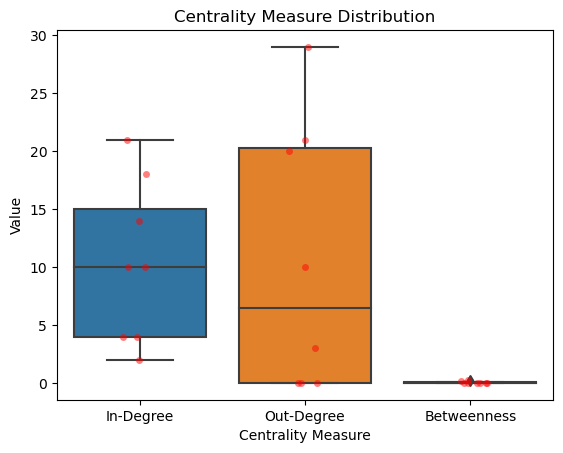

In [ ]:

melted_df = centrality_df.melt(id_vars='User', var_name='Centrality Measure', value_name='Value')

# Plot centrality measures
sns.boxplot(data=melted_df, x='Centrality Measure', y='Value')
sns.stripplot(data=melted_df, x='Centrality Measure', y='Value', color='red', alpha=0.5, jitter=True)
plt.title('Centrality Measure Distribution')
plt.show()


In [ ]:
# Ensure columns are numeric
centrality_df['In-Degree'] = pd.to_numeric(centrality_df['In-Degree'], errors='coerce')
centrality_df['Out-Degree'] = pd.to_numeric(centrality_df['Out-Degree'], errors='coerce')
centrality_df['Betweenness'] = pd.to_numeric(centrality_df['Betweenness'], errors='coerce')

# Group data
in_degree_groups = [centrality_df.loc[centrality_df['User'] == user, 'In-Degree'] for user in centrality_df['User'].unique()]

# Ensure there are multiple groups with data
in_degree_groups = [group.dropna() for group in in_degree_groups if not group.empty]

if len(in_degree_groups) > 1:
    # Kruskal-Wallis Test
    H_in_degree, p_in_degree = kruskal(*in_degree_groups)
    print(f"Kruskal-Wallis Test for In-Degree: H-statistic={H_in_degree}, p-value={p_in_degree}")
else:
    print("Insufficient unique groups for In-Degree Kruskal-Wallis test.")


Kruskal-Wallis Test for In-Degree: H-statistic=6.999999999999996, p-value=0.4288798575530548


The results of the Kruskal-Wallis test for in-degree are as follows:

H-statistic: 6.999999999999996
p-value: 0.4288798575530548

##**Verdict**
With a p-value of 0.4289, which is greater than the common significance level of 0.05, we fail to reject the null hypothesis (H₀).

This suggests that the in-degree values (number of incoming interactions) are consistent across all users, and no user has an unusually high or low in-degree compared to others.

##**Lean On You-User Dependency Hypothesis**

Certain users depend on others for initiating interactions (e.g., replying more often than starting conversations).

**Null Hypothesis (H₀):** The proportion of replies initiated by each user is equal across all users.

**Alternative Hypothesis (H₁):** Certain users disproportionately depend on others to initiate replies.

**Test:**
Compare the ratio of outgoing to incoming edges for each user and perform a chi-square test to identify significant deviations.

In [ ]:
import pandas as pd
import altair as alt
import networkx as nx
from scipy.stats import chi2_contingency


file_path = 'final_chat_data.csv'
df = pd.read_csv(file_path)

# Ensure Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


number_to_username = {
    "905327801570": "Gülbin",
    "32470118635": "Defne",
    "905058121965": "Ben",
    "905384584618": "Duru",
    "905051171961": "Azra",
    "16093754278": "Eslem",
    "905378333878": "Zeynep",
}

# Step 1: Extract Reply Targets from the Message column
def extract_reply_target(message):
    if isinstance(message, str) and "@" in message:
        # Extract text after "@" and before the next space
        start_idx = message.find("@") + 1
        end_idx = message.find(" ", start_idx) if " " in message[start_idx:] else len(message)
        return message[start_idx:end_idx]
    return None

df['Reply Target'] = df['Message'].apply(extract_reply_target)

# Step 2: Replace numbers with usernames
df['Sender'] = df['Sender'].replace(number_to_username)
df['Reply Target'] = df['Reply Target'].replace(number_to_username)

# Step 3: Filter rows with valid Reply Targets
df_replies = df.dropna(subset=['Reply Target'])[['Sender', 'Reply Target']]

# Step 4: Count interactions (Sender -> Reply Target)
interaction_counts = df_replies.groupby(['Sender', 'Reply Target']).size().reset_index(name='Count')

# Step 5: Create a directed graph using NetworkX
G = nx.DiGraph()
for _, row in interaction_counts.iterrows():
    G.add_edge(row['Sender'], row['Reply Target'], weight=row['Count'])

# Prepare data for visualization
graph_data = nx.to_pandas_edgelist(G)
nodes = pd.DataFrame(list(G.nodes()), columns=['User'])

# Step 6: Calculate Outgoing-to-Incoming Ratios
degrees = pd.DataFrame({
    "User": list(G.nodes),
    "Outgoing": [G.out_degree(node, weight='weight') for node in G.nodes],
    "Incoming": [G.in_degree(node, weight='weight') for node in G.nodes],
})
degrees['Outgoing-to-Incoming Ratio'] = degrees['Outgoing'] / degrees['Incoming']
degrees['Outgoing-to-Incoming Ratio'] = degrees['Outgoing-to-Incoming Ratio'].fillna(0)

# Step 7: Filter out invalid nodes (e.g., 'gmail.com') and numeric users
valid_users = degrees[~degrees['User'].str.contains(r'\d', na=False)]['User'].tolist()

# Filter degrees for valid users
degrees_filtered = degrees[degrees['User'].isin(valid_users)]

# Step 8: Perform Chi-Square Test
observed = degrees_filtered[['Outgoing', 'Incoming']].values
chi2_stat, p_value, dof, expected = chi2_contingency(observed)

#Chi-Square Test Results
print("Chi-Square Test for User Dependency:")
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Step 9: Visualize Outgoing-to-Incoming Ratios with cleaned usernames
chart = alt.Chart(degrees_filtered).mark_bar().encode(
    x=alt.X('User:N', title='User'),
    y=alt.Y('Outgoing-to-Incoming Ratio:Q', title='Outgoing-to-Incoming Ratio'),
    tooltip=['User', 'Outgoing-to-Incoming Ratio']
).properties(
    title='Outgoing-to-Incoming Ratio for Each User',
    width=600,
    height=400
)


chart.display()


Chi-Square Test for User Dependency:
Chi-Square Statistic: 22.06827838827839
p-value: 0.002472462019642776
Degrees of Freedom: 7
Expected Frequencies:
[[17.5 17.5]
 [ 2.   2. ]
 [15.  15. ]
 [14.  14. ]
 [25.  25. ]
 [ 6.5  6.5]
 [ 2.   2. ]
 [ 1.   1. ]]


alt.Chart(...)

##**Verdict**
The p-value (0.00247) is less than the significance level of 0.05.
This indicates strong evidence against the null hypothesis.
**Decision:** We reject the null hypothesis. This means that certain users disproportionately depend on others for initiating replies (i.e., the distribution of outgoing and incoming interactions is not uniform).


##**What Else**
**Chi-Square Statistic**

The Chi-Square statistic (22.07) quantifies how much the observed outgoing and incoming interactions deviate from the expected uniform distribution under the null hypothesis.
A higher statistic indicates greater deviation from uniformity.



**Degrees of Freedom:**

The degrees of freedom (7) represent the number of independent comparisons being made (equal to the number of users minus 1).
This confirms the test analyzed differences across all users.

**Conclusion**

From the bar chart shown, users with a lower Outgoing-to-Incoming Ratio depend more on others for initiating interactions. A lower ratio implies that the user sends fewer messages (outgoing) relative to the messages they receive (incoming).
**Zeynep has the lowest Outgoing-to-Incoming Ratio**, indicating a higher dependency on others for initiating interactions.
Duru also has a lower ratio compared to users like Defne or Gülbin, but still higher than Zeynep.

**On the other hand, users like Defne and Gülbin have the highest ratios**, suggesting that they are **more independent in initiating interactions** rather than relying on others.